In [2]:
import numpy as np 
import pandas as pd
from pandas import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA
from sklearn.metrics import mean_squared_error

sns.set_style('darkgrid')
warnings.filterwarnings("ignore")

In [3]:
''' reading dataset '''
df = pd.read_csv('AMZN.csv')

In [4]:
''' displaying first 5 rows '''
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [5]:
''' checking null values '''
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
''' shape of data '''
df.shape

(5665, 7)

In [10]:
''' converting Date column into datetime '''
df['Date'] = df['Date'].map(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [11]:
''' making Date as index of data '''
df.set_index('Date', inplace=True)

In [12]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [13]:
''' info of data '''
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5665 entries, 1997-05-15 to 2019-11-15
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5665 non-null   float64
 1   High       5665 non-null   float64
 2   Low        5665 non-null   float64
 3   Close      5665 non-null   float64
 4   Adj Close  5665 non-null   float64
 5   Volume     5665 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 309.8 KB


In [14]:
''' describe '''
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000,5.665000e+03
mean,315.126044,318.499003,311.288491,315.053306,315.053306,7.602816e+06
std,488.289599,492.442904,483.041434,487.953106,487.953106,7.369511e+06
min,1.406250,1.447917,1.312500,1.395833,1.395833,4.872000e+05
25%,37.150002,37.980000,36.500000,37.150002,37.150002,3.712600e+06
50%,80.110001,81.949997,78.010002,79.937500,79.937500,5.721800e+06
75%,320.989990,324.130005,316.750000,322.200012,322.200012,8.641200e+06
max,2038.109985,2050.500000,2013.000000,2039.510010,2039.510010,1.043292e+08


In [15]:
''' dropping some columns '''
df.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], inplace=True, axis=1)
df - df[df.index > '2015-01-01']

df.head()

,Close
Date,
1997-05-15,1.958333
1997-05-16,1.729167
1997-05-19,1.708333
1997-05-20,1.635417
1997-05-21,1.427083


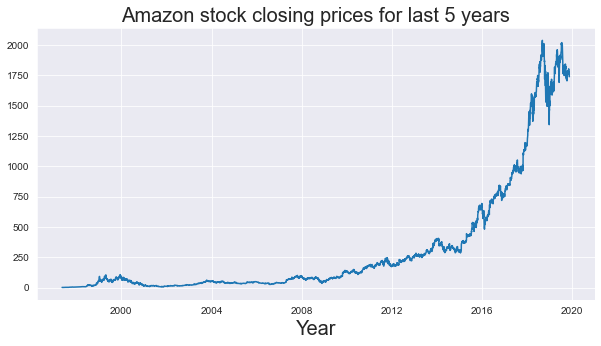

In [21]:
plt.figure(figsize=(10, 5))
plt.title('Amazon stock closing prices for last 5 years', fontsize=20)
plt.plot(df['Close']);
plt.xlabel('Year', fontsize=20);

In [34]:
''' checking stationary of data '''
mean_2019 = df[(df.index >= '2019-01-01') & (df.index < '2019-03-31')].mean()
var_2019  = df[(df.index >= '2019-01-01') & (df.index < '2019-03-31')].var()

mean_2017 = df[(df.index >= '2017-01-01') & (df.index < '2017-03-31')].mean()
var_2017  = df[(df.index >= '2017-01-01') & (df.index < '2017-03-31')].var()

mean_2015 = df[(df.index >= '2015-10-01') & (df.index < '2015-12-31')].mean()
var_2015  = df[(df.index >= '2015-10-01') & (df.index < '2015-12-31')].var()

print('2019 closing price mean: {}'.format(round(mean_2019, 2)))
print('2019 Qclosing price variance : {}'.format(round(var_2019, 2)))
print("-" * 100)
print()

print('2017 closing price mean: {}'.format(round(mean_2017, 2)))
print('2017 closing price variance: {}'.format(round(var_2017, 2)))
print("-" * 100)
print()

print('2015 closing price mean: {}'.format(round(mean_2015, 2)))
print('2015 closing price variance: {}'.format(round(var_2015, 2)))

2019 closing price mean: Close    1664.34
dtype: float64
2019 Qclosing price variance : Close    3961.09
dtype: float64
----------------------------------------------------------------------------------------------------

2017 closing price mean: Close    832.63
dtype: float64
2017 closing price variance: Close    630.34
dtype: float64
----------------------------------------------------------------------------------------------------

2015 closing price mean: Close    629.68
dtype: float64
2015 closing price variance: Close    2663.21
dtype: float64


<Figure size 720x360 with 0 Axes>

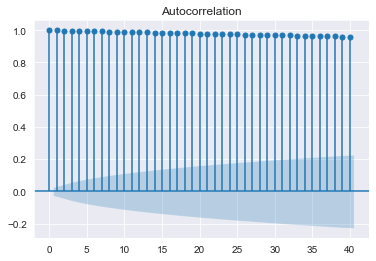

In [40]:
''' Plot the correlation function  '''
plt.figure(figsize=(10, 5));
plot_acf(df, lags=40);
plt.show()

In [42]:
''' converting series into stationary series '''
df_diff = df.diff(periods=1)
df_diff = df_diff.dropna()
df_diff.head()

,Close
Date,
1997-05-16,-0.229166
1997-05-19,-0.020834
1997-05-20,-0.072916
1997-05-21,-0.208334
1997-05-22,-0.031250


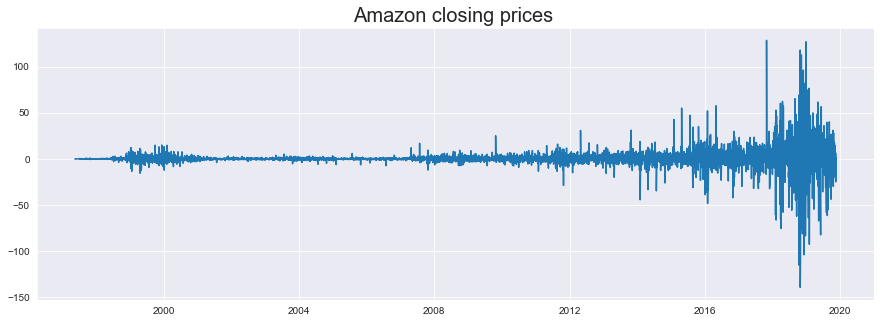

In [45]:
plt.figure(figsize=(15,5))
plt.title("Amazon closing prices ",fontsize=20)
plt.plot(df_diff);

<Figure size 720x720 with 0 Axes>

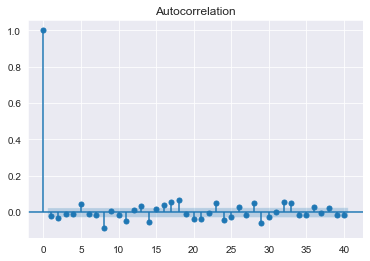

In [46]:
''' Plot the autocorrelation function. The ACF value decreases to zero quickly for stationary series '''
plt.figure(figsize=(10, 10))
plot_acf(df_diff, lags=40)
plt.show()

In [48]:
''' Autoregression Model '''
X = df.values
size = int(len(df) * 0.70)

X_train = df[:size]
X_test = df[size:]

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (3965, 1)
X_test shape:  (1700, 1)


In [58]:
''' Model'''
model = AR(X_train)
model = model.fit()

print("Lags: ", model.k_ar)
print("Coefficients: ", model.params)

Lags:  30
Coefficients:  const        0.042003
L1.Close     0.977925
L2.Close    -0.033507
L3.Close     0.069038
L4.Close    -0.028687
L5.Close    -0.000537
L6.Close    -0.022892
L7.Close     0.032739
L8.Close     0.009535
L9.Close    -0.031172
L10.Close    0.031473
L11.Close   -0.008102
L12.Close   -0.004352
L13.Close    0.013952
L14.Close   -0.019502
L15.Close   -0.015584
L16.Close    0.057588
L17.Close   -0.000022
L18.Close   -0.060083
L19.Close    0.031500
L20.Close   -0.012768
L21.Close    0.009893
L22.Close   -0.027115
L23.Close    0.017227
L24.Close    0.000074
L25.Close    0.023795
L26.Close   -0.045126
L27.Close    0.023747
L28.Close    0.023223
L29.Close   -0.003423
L30.Close   -0.008215
dtype: float64


MSE:  393024.6619236417
----------------------------------------------------------------------------------------------------



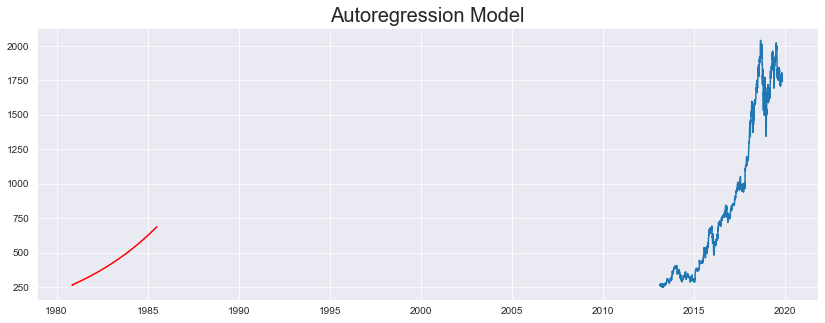

In [66]:
''' prediction '''
y_pred = model.predict(start=len(X_train), end=len(X_train)+len(X_test)-1, dynamic=False)

print("MSE: ", mean_squared_error(X_test, y_pred))
print("-" * 100)
print()

plt.figure(figsize=(14,5))
plt.title("Autoregression Model", fontsize=20)
plt.plot(X_test)
plt.plot(y_pred, color='r');